## OLDD (not done) Notebook that takes in a some PC-GITA data, extract some features and classifies with an CNN model 

--> Will rather use the generated features and extract them, so look at new method. Also clean up this file. 
import_data, feature_extraction used to create a simple model. To be used as first results (used in poster)

Feature used: Prosody --> energy level. 
Data used: Sentence: micasa


GOAL IS TO: Test med å extracte nokon features, og lag ein super lett modell eg kan feede det til. --> evt i ei anna fil. 

## Imports

In [1]:
# %run project_setup.py 

import os
from constants import personal_path_to_kaldi

# Set kaldi environment 
os.environ['KALDI_ROOT']=personal_path_to_kaldi


import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import layers, models # from tensorflow.keras import layers, models


from IPython.display import Audio


from disvoice.articulation.articulation import Articulation
from disvoice.phonation.phonation import Phonation
from disvoice.prosody.prosody import Prosody

from constants import path_PC_GITA_16k

2023-12-13 14:30:01.019339: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 14:30:01.019375: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 14:30:01.020420: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 14:30:01.027517: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-13 14:30:01.870852: W tensorflow/compiler/tf2

## Import data --> MICASA and feature extraction 
### Data 
Import all data and labels (PD vs HC) of one type of sentence to train a model.  --> T.d for micasa first. 

Mi casa tiene tres cuartos. (Simple)
Translation: My house has three rooms

### Features 
Uses prosoody --> energy.  

- Extract some features from this data to look into if there is difference between PD and HC in some of the aspects. 

Note at: 
- Sjølv om eg visar energi sekvensen for heile talesignalet så er featura eg sender inn t.d 
Energy of the 1. or last voiced segment, etc  sjå procody oversikta. 


In [2]:
# Code to get all waveforms from one folder.

root_folder = path_PC_GITA_16k + "/sentences/micasa/sin_normalizar" # Path to the root folder

prosodyf=Prosody()


# Dictionary to store the waveforms. 
# waveforms["PD"] will store all waveform examples for PD patients. Same for HC and sobrano. 
waveforms = {}
waveforms["HC"] = []
waveforms["PD"] = []
waveforms["sobrano"] = []

# Dictionary to store the features. Same storing syntax as waveforms dict. 
prosody_features = {}
prosody_features["HC"] = []
prosody_features["PD"] = []
prosody_features["sobrano"] = []

for dirpath, dirnames, filenames in os.walk(root_folder):  # Iterate through the directory tree
    for filename in filenames:
        filepath = os.path.join(dirpath, filename)
        if "PD" in dirpath and "los_que_sobraron" not in dirpath:
            waveforms["PD"].append(filepath)
            features1=prosodyf.extract_features_file(filepath, static=True, plots=False, fmt="csv")
            prosody_features["PD"].append(features1)
        elif "HC" in dirpath and "los_que_sobraron" not in dirpath: 
            waveforms["HC"].append(filepath)
            features1=prosodyf.extract_features_file(filepath, static=True, plots=False, fmt="csv")
            prosody_features["HC"].append(features1)
        else: 
            waveforms["sobrano"].append(filepath)
            features1=prosodyf.extract_features_file(filepath, static=True, plots=False, fmt="csv")
            prosody_features["sobrano"].append(features1)
            # Normally hopefully no data is here. 
            # For now I put "los_que_sobraron" here to avoid having more PD than HC. 
            
print(f"Num of waveforms for PD", len(waveforms["PD"])) 
print(f"Num of waveforms for HC", len(waveforms["HC"])) 
print(f"Num of waveforms for none", len(waveforms["sobrano"])) 

print(f"Num of waveforms for PD", len(prosody_features["PD"])) 
print(f"Num of waveforms for HC", len(prosody_features["HC"])) 
print(f"Num of waveforms for none", len(prosody_features["sobrano"])) 
        

/localhome/studenter/malinre/miniconda3/envs/disenv/lib/python3.11/site-packages/disvoice/prosody/prosody_functions.py:260: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return np.asarray([np.mean(dur), np.std(dur), st.skew(dur), st.kurtosis(dur), np.max(dur), np.min(dur)])
/localhome/studenter/malinre/miniconda3/envs/disenv/lib/python3.11/site-packages/disvoice/prosody/prosody_functions.py:260: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return np.asarray([np.mean(dur), np.std(dur), st.skew(dur), st.kurtosis(dur), np.max(dur), np.min(dur)])
/localhome/studenter/malinre/miniconda3/envs/disenv/lib/python3.11/site-packages/disvoice/prosody/prosody_functions.py:260: RuntimeWarning: Precision loss occurred in moment calculation due to cat

Num of waveforms for PD 50
Num of waveforms for HC 50
Num of waveforms for none 17
Num of waveforms for PD 50
Num of waveforms for HC 50
Num of waveforms for none 17


/localhome/studenter/malinre/miniconda3/envs/disenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/localhome/studenter/malinre/miniconda3/envs/disenv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/localhome/studenter/malinre/miniconda3/envs/disenv/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/localhome/studenter/malinre/miniconda3/envs/disenv/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/localhome/studenter/malinre/miniconda3/envs/disenv/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar

In [5]:
Audio(waveforms["HC"][20], autoplay=False) # Needs to be the last part in the code. 



In [6]:
display(prosody_features["HC"][0])

,F0avg,F0std,F0max,F0min,F0skew,F0kurt,F0tiltavg,F0mseavg,F0tiltstd,F0msestd,...,skwdurpause,kurtosisdurpause,maxdurpause,mindurpause,PVU,PU,UVU,VVU,VP,UP
0,239.577576,45.125965,342.76709,161.26564,0.118788,-0.865774,-180.276455,464.137837,256.629158,632.427759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Plot one example 

/localhome/studenter/malinre/miniconda3/envs/disenv/lib/python3.11/site-packages/disvoice/prosody/prosody.py:177: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax1.plot(t, data_audio, 'k', label="speech signal",


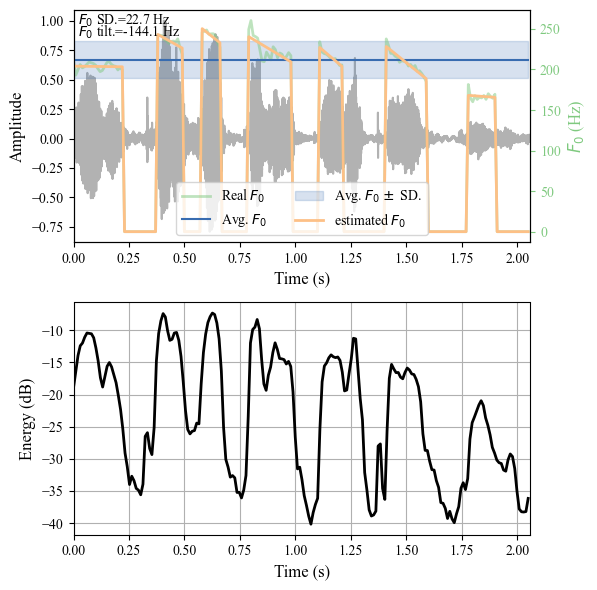

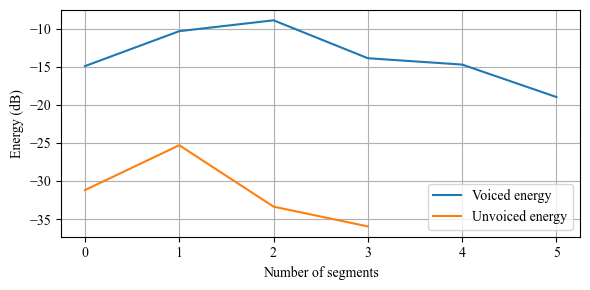

All


,F0avg,F0std,F0max,F0min,F0skew,F0kurt,F0tiltavg,F0mseavg,F0tiltstd,F0msestd,...,skwdurpause,kurtosisdurpause,maxdurpause,mindurpause,PVU,PU,UVU,VVU,VP,UP
0,211.936951,22.671539,260.304962,160.176498,-0.458452,-0.094335,-144.074868,26.970012,88.061018,29.908864,...,8.364450e-15,-2.0,0.18,0.17,0.688525,1.627907,0.422951,0.577049,0.838095,0.614286


In [15]:
# Extract articulation features (to test a bit) 
prosodyf=Prosody()

## Extract static features and return them as a dataframe 
features1=prosodyf.extract_features_file(waveforms["PD"][2], static=True, plots=True, fmt="csv") # change plots = False til True for å plotte bilda. 
# print(features1) 
print("All")
display(features1) # features1 is a df and it is prettier when we use display. 


## Simple CNN model 

### Choose feature 
- Tester med average energy in first voiced segment --> 43'd element --> point 42

In [16]:
def plot_features(choosen_features, feature_types): 
    """
    Function to plot given features and find average between all people. 
    
    choosen_features: dict with HC and PC and then list of all the feature values of the poeple we have data for. 
    y_label: Text that explaines what type of feature it is. 
    """
    
    HC = np.array(choosen_features["HC"])
    PD = np.array(choosen_features["PD"])
    
    num_HC = len(HC)
    num_PD = len(PD)
    
    for i in range(len(feature_types)):
        
        avgHC = np.average(HC[:, i])
        avgPD = np.average(PD[:, i])
        print(" ")
        print(f"The average value for {feature_types[i]} is: ")
        print(f"   Over the {num_HC} people in HC was {avgHC}")
        print(f"   Over the {num_PD} people with PD was {avgPD}")

        
        x_HC = list(range(1, num_HC + 1))
        x_PD = list(range(1, num_PD + 1))

        # Plot 
        plt.scatter(x_HC, HC[:, i], color = "darkgreen", label="HC")
        plt.scatter(x_PD, PD[:, i], color = "firebrick", label="PD")
        plt.axhline(y=avgHC, color='darkgreen', linestyle='--', label='Average value for HC')
        plt.axhline(y=avgPD, color='firebrick', linestyle='--', label='Average value for PD')
        plt.text(-1, avgHC, np.round(avgHC), color='darkgreen', verticalalignment='bottom')
        plt.text(-1, avgPD, np.round(avgPD), color='firebrick', verticalalignment='bottom')

        plt.plot()
        plt.title(feature_types[i] + ' for different HC and PD people')
        plt.xlabel('Person nr')
        plt.ylabel(feature_types[i])
        plt.legend(loc='upper right')
        plt.show()
    
def create_choosen_features(feature_types, all_features):
    """
    Creates a dictionary with "HC" and "PD" as keys, where each key has a list representing the features in feature_types
    for the different peoples in HC and PD. 

    Args:
        feature_types (list): list of features types we want to use. 
        all_features (dictionary): Dictionary containing all features for all people in HC and PD group.  

    Returns:
        dictionary: with "HC" and "PD" as keys, where each key has a list representing the features for the 
    different peoples in HC and PD. 
    """
    
    # print(prosody_features["HC"][0].loc[0, feature_type].to_list())

    choosen_features = {}
    choosen_features["HC"] = []
    choosen_features["PD"] = []

    for elem in all_features["HC"]: 
        choosen_features["HC"].append(elem.loc[0, feature_types].to_list())
        
    for elem in all_features["PD"]: 
        choosen_features["PD"].append(elem.loc[0, feature_types].to_list())
    return choosen_features
    

 
The average value for avg1Evoiced is: 
   Over the 50 people in HC was -22.827284102846065
   Over the 50 people with PD was -18.917781472630324


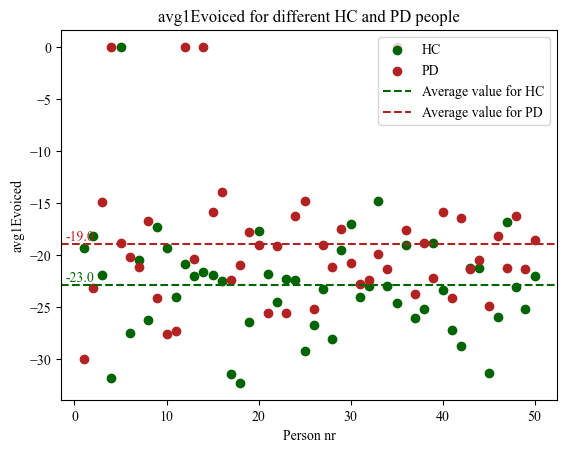

 
The average value for avgEvoiced is: 
   Over the 50 people in HC was -19.680942737565893
   Over the 50 people with PD was -17.385012674525715


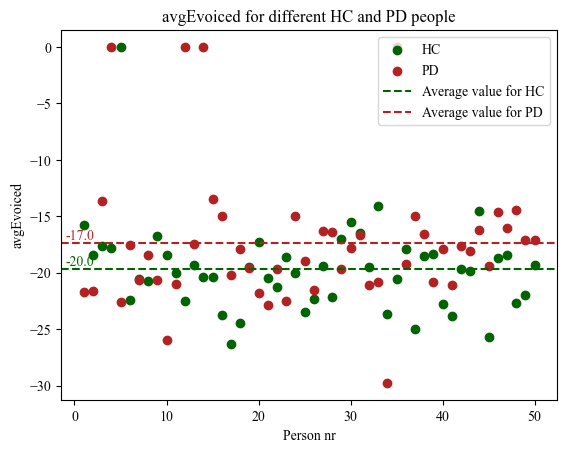

In [17]:
# Get multiple features example: 
# Need to look into a better way to just extract multiple features to a new list 
    # for when I am testing with multiple features. For now this will work. 

feature_types = ["avg1Evoiced", "avgEvoiced"]
# feature_types= ['avgEvoiced', 'stdEvoiced', 'skwEvoiced', 'kurtosisEvoiced', 'avgtiltEvoiced', 'stdtiltEvoiced', 'skwtiltEvoiced', 'kurtosistiltEvoiced', 'avgmseEvoiced', 'stdmseEvoiced', 'skwmseEvoiced', 'kurtosismseEvoiced', 'avg1Evoiced', 'std1Evoiced', 'max1Evoiced', 'min1Evoiced', 'skw1Evoiced', 'kurtosis1Evoiced', 'avglastEvoiced', 'stdlastEvoiced', 'maxlastEvoiced', 'minlastEvoiced', 'skwlastEvoiced', 'kurtosislastEvoiced', 'avgEunvoiced', 'stdEunvoiced', 'skwEunvoiced', 'kurtosisEunvoiced', 'avgtiltEunvoiced', 'stdtiltEunvoiced', 'skwtiltEunvoiced', 'kurtosistiltEunvoiced', 'avgmseEunvoiced', 'stdmseEunvoiced', 'skwmseEunvoiced', 'kurtosismseEunvoiced', 'avg1Eunvoiced', 'std1Eunvoiced', 'max1Eunvoiced', 'min1Eunvoiced', 'skw1Eunvoiced', 'kurtosis1Eunvoiced', 'avglastEunvoiced', 'stdlastEunvoiced', 'maxlastEunvoiced', 'minlastEunvoiced', 'skwlastEunvoiced', 'kurtosislastEunvoiced']

choosen_features = create_choosen_features(feature_types, prosody_features)
# display(choosen_features["HC"])

plot_features(choosen_features, feature_types)



### Data splitting 

In [18]:
# Initialize lists to store samples and labels
values = []
labels = []

label_mapping = {"HC": 0, "PD": 1}

print(choosen_features.keys())

# Iterate through the feature dictionary
for label, value in choosen_features.items():
    # print(feature_list)
    values.extend(value)  # Extend the features list with the samples for each label
    num_label = label_mapping[label]
    labels.extend([num_label] * len(value))  # Add labels corresponding to each feature

# Convert samples and labels to numpy arrays
num_features = len(values[0])
x = np.array(values).reshape(-1, num_features, 1)
y = np.array(labels)

# Split the data into training, validation, and testing sets (60% training, 20% validation, 20% testing)
train_data, temp_data, train_labels, temp_labels = train_test_split(x, y, test_size=0.4, random_state=42)
val_data, test_data, val_labels, test_labels = train_test_split(temp_data, temp_labels, test_size=0.5, random_state=42)

print(len(train_data))
print(len(test_data))
print(len(val_data))

display(values[0])
display(choosen_features["HC"][0])

print(train_data[0].shape)


dict_keys(['HC', 'PD'])
60
20
20


[-19.321091003765847, -15.76315711834553]

[-19.321091003765847, -15.76315711834553]

(2, 1)


#### CNN that takes inn these features  --> cant make it work in aulus yet. 

In [20]:
# shape = train_data[0].shape
shape = (2,1)
def create_cnn_model():
    model = models.Sequential([
        layers.Input(shape=shape),
        layers.Conv1D(32, kernel_size=2, padding='same', activation='relu'),
        layers.Conv1D(16, kernel_size=2, padding='same', activation='relu'),
        layers.Conv1D(2 * 256, kernel_size=2, padding='same', activation='relu'),
        layers.GlobalAveragePooling1D(),
        layers.Dense(2, activation='softmax')  # Output layer with 2 classes
    ])

    return model


# Create and compile the model
cnn_model = create_cnn_model()
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model

cnn_model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(test_data, test_labels, verbose=2)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


# Print the model summary
# cnn_model.summary()


Epoch 1/5


2/2 [==============================] - 1s 114ms/step - loss: 0.7436 - accuracy: 0.5167 - val_loss: 0.7377 - val_accuracy: 0.4500
Epoch 2/5
2/2 [==============================] - 0s 20ms/step - loss: 0.7029 - accuracy: 0.5000 - val_loss: 0.6817 - val_accuracy: 0.6000
Epoch 3/5
2/2 [==============================] - 0s 21ms/step - loss: 0.7047 - accuracy: 0.5000 - val_loss: 0.6811 - val_accuracy: 0.6000
Epoch 4/5
2/2 [==============================] - 0s 21ms/step - loss: 0.7010 - accuracy: 0.5000 - val_loss: 0.6844 - val_accuracy: 0.6000
Epoch 5/5
2/2 [==============================] - 0s 19ms/step - loss: 0.6940 - accuracy: 0.4833 - val_loss: 0.6991 - val_accuracy: 0.4500
1/1 - 0s - loss: 0.7023 - accuracy: 0.4000 - 14ms/epoch - 14ms/step
Test accuracy: 40.00%
